In [1]:
from datetime import datetime
import backtrader as bt
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


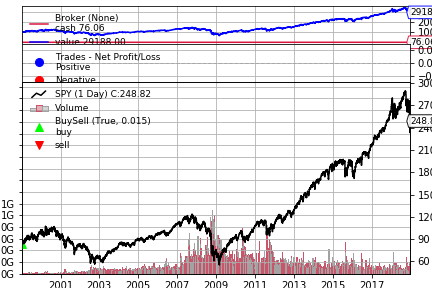

[[<Figure size 432x288 with 4 Axes>]]

In [2]:
class Strat(bt.Strategy):
    def next(self):
        if not self.getposition(self.data).size:
            self.order_target_percent(self.data, target=1.0)


start = datetime(1999,1,1)
end = datetime(2019,1,1)

cerebro = bt.Cerebro()

data = bt.feeds.YahooFinanceData(dataname='SPY',
                                 fromdate=start,
                                 todate=end)
cerebro.adddata(data)
cerebro.addstrategy(Strat)
cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio') 

results = cerebro.run()
cerebro.plot()

In [3]:
import pyfolio as pf

/usr/local/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


Start date,1999-01-04
End date,2018-12-31
Total months,239
,Backtest
Annual return,5.5%
Cumulative returns,191.9%
Annual volatility,19.1%
Sharpe ratio,0.38
Calmar ratio,0.10
Stability,0.71
Max drawdown,-54.9%


/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,54.90,2007-10-09,2009-03-09,2012-08-16,1268
1,47.23,2000-03-24,2002-10-09,2006-10-26,1720
2,19.31,2018-09-20,2018-12-24,NaT,NaN
3,12.99,2015-07-20,2016-02-11,2016-04-18,196
4,11.62,1999-07-16,1999-10-15,1999-11-17,89


<IPython.core.display.Javascript object>


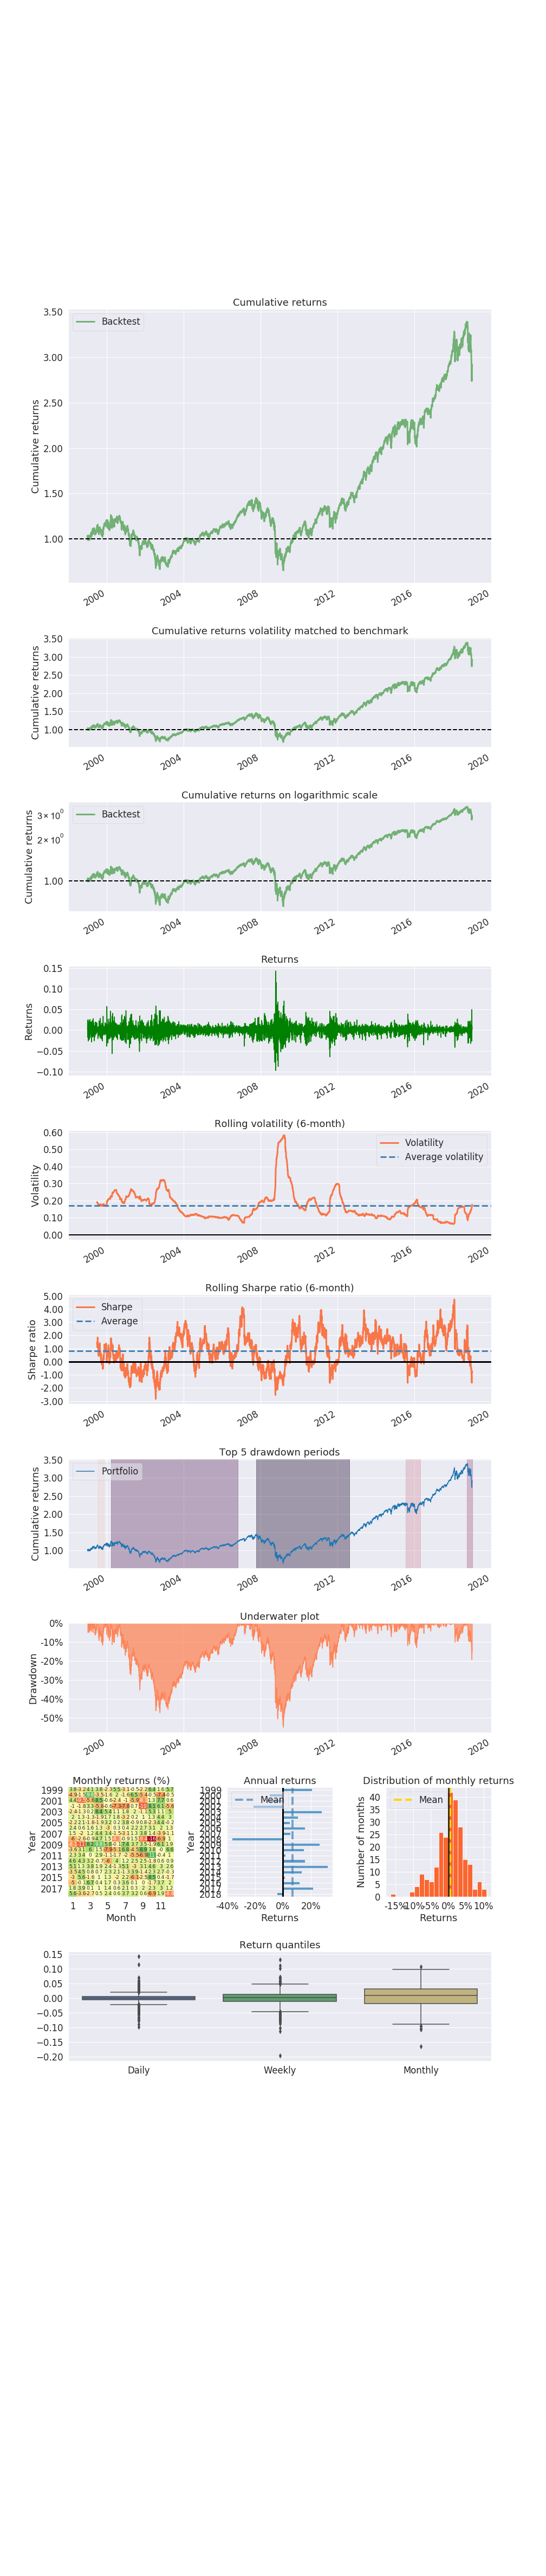

Stress Events,mean,min,max
Dotcom,0.06%,-5.68%,4.65%
Lehman,-0.17%,-7.79%,4.11%
9/11,0.04%,-5.18%,3.49%
US downgrade/European Debt Crisis,-0.06%,-6.47%,4.62%
Fukushima,0.14%,-1.84%,1.54%
US Housing,-0.47%,-2.60%,1.91%
EZB IR Event,-0.01%,-1.06%,1.52%
Aug07,0.06%,-2.95%,1.96%
Mar08,0.14%,-2.46%,4.12%
Sept08,-0.40%,-7.79%,4.11%


<IPython.core.display.Javascript object>


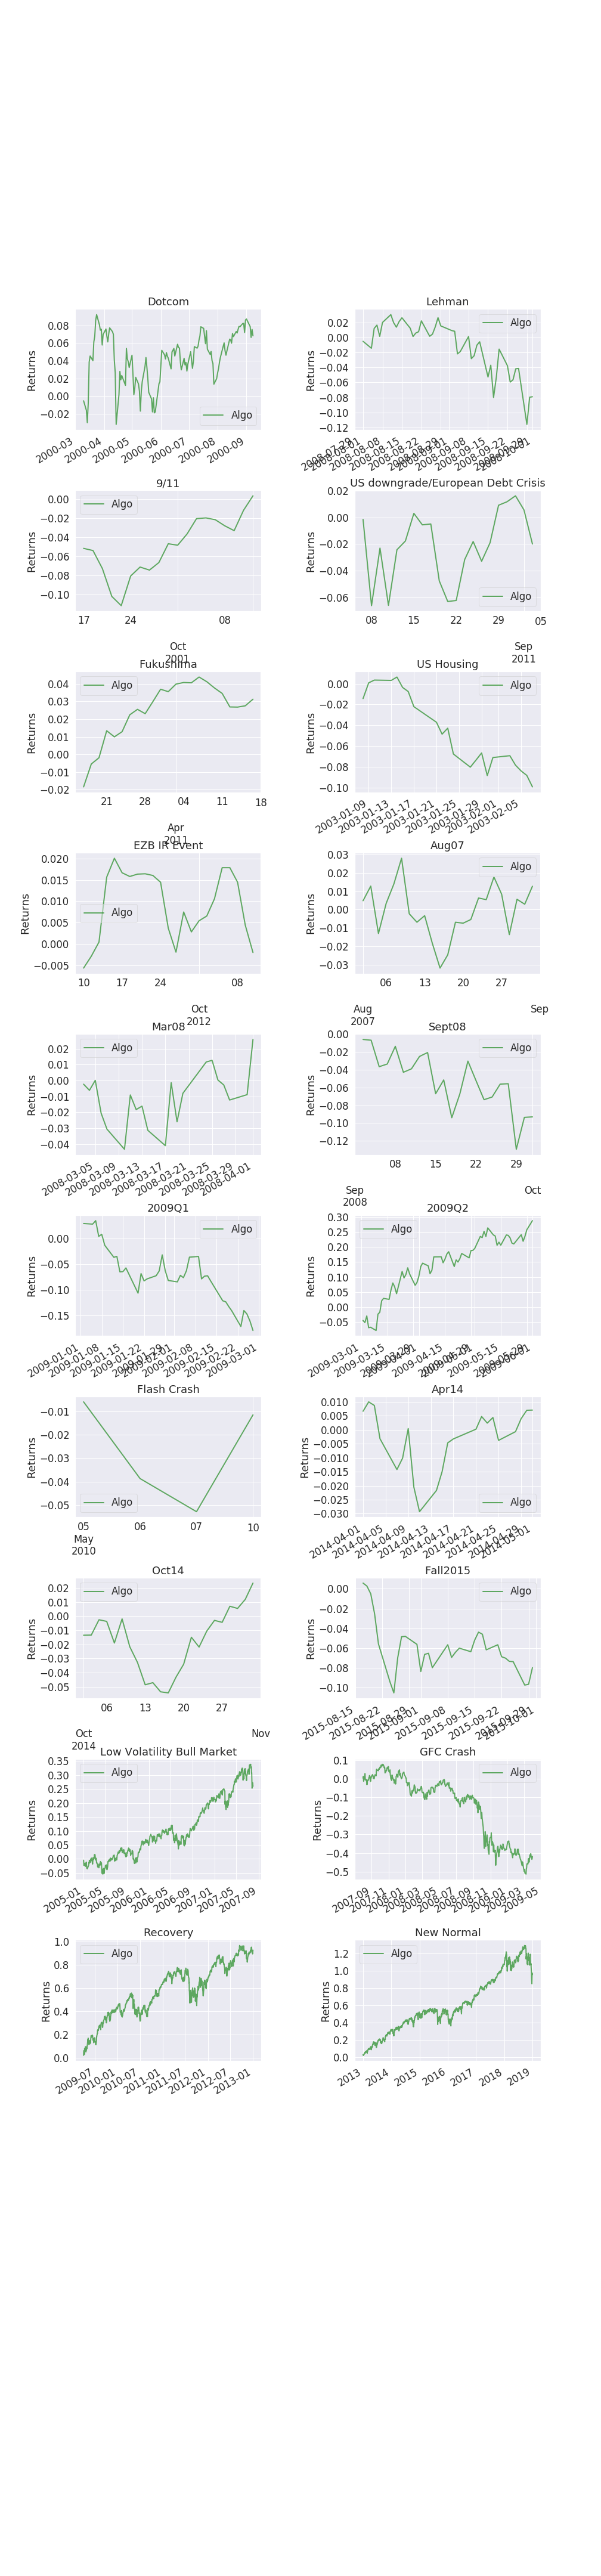

<IPython.core.display.Javascript object>


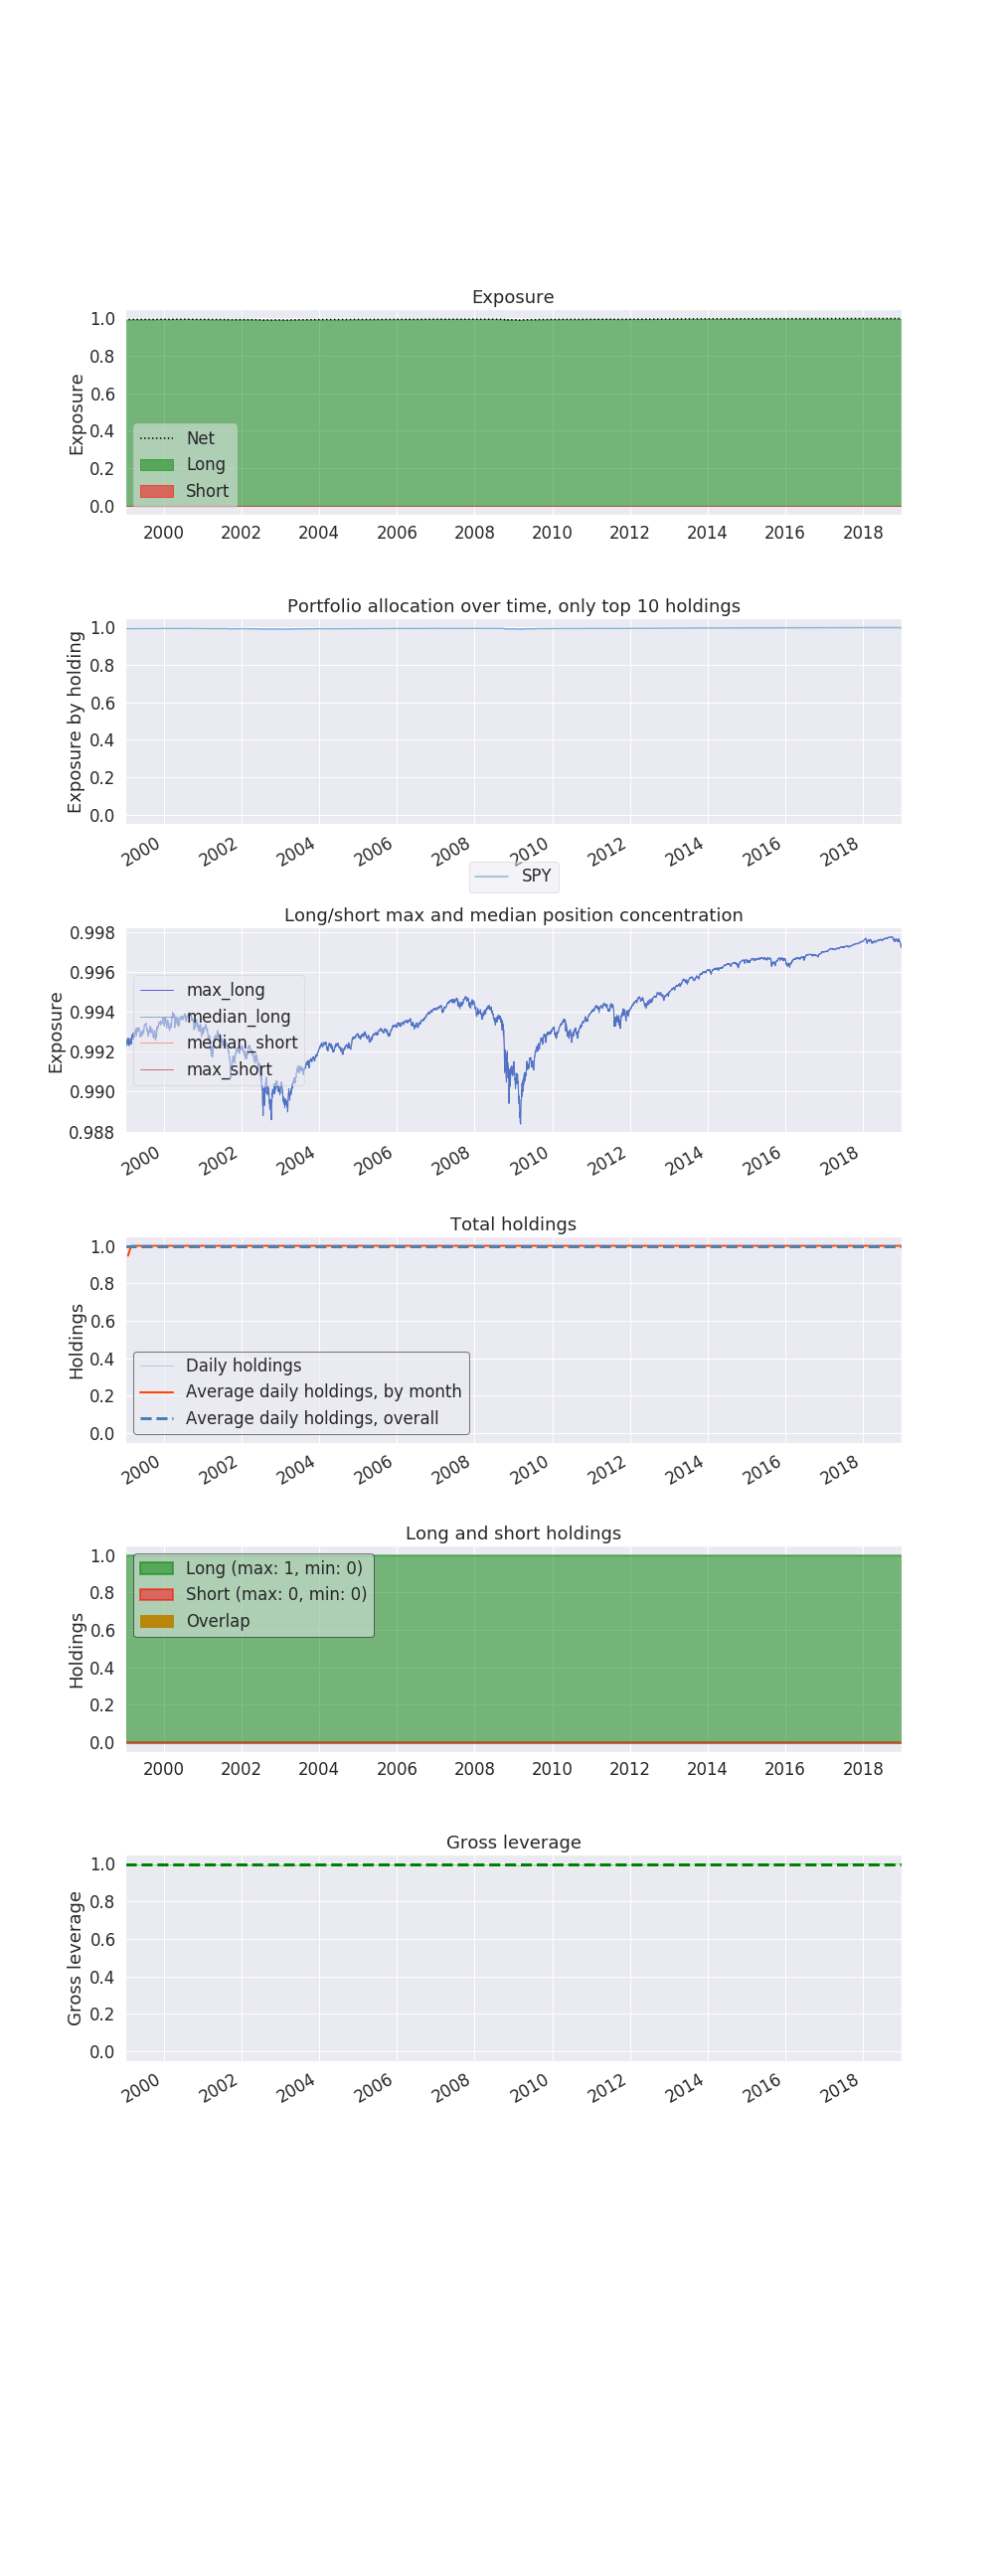

Top 10 long positions of all time,max
SPY,99.78%


Top 10 short positions of all time,max


Top 10 positions of all time,max
SPY,99.78%


<IPython.core.display.Javascript object>


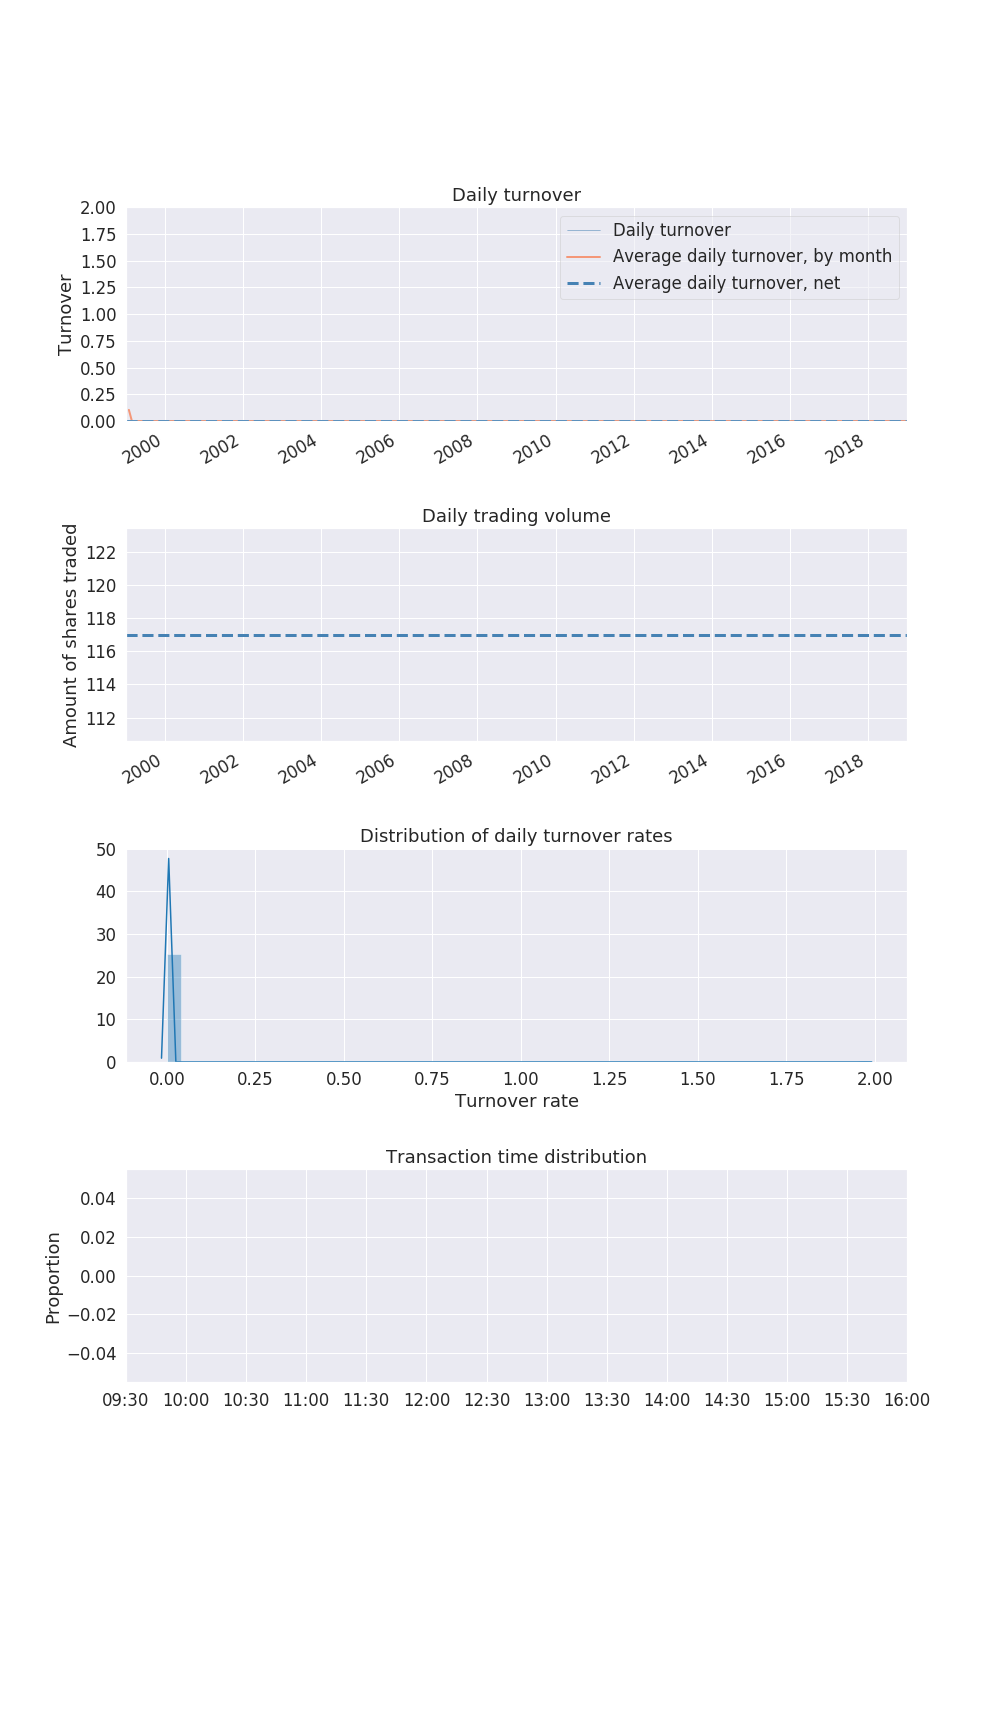

In [4]:

strat = results[0]
pyfoliozer = strat.analyzers.getbyname('pyfolio')
returns, positions, transactions, gross_lev = pyfoliozer.get_pf_items()
pf.create_full_tear_sheet(
            returns,
            positions=positions,
            transactions=transactions)